Beata Sirowy

# Bayes therorem in practice

Based on: Downey, A. (2021) _Think Bayes_

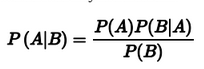

### The cookie problem

Suppose there are two bowls of cookies.

- Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.
- Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.

Now suppose you choose one of the bowls at random and, without looking,
choose a cookie at random. If the cookie is vanilla, what is the probability that
it came from Bowl 1?

P (Bowl 1, given = vanilla) = P(Bowl1)P(vanilla, given Bowl1) / P(vanilla)

P(B1\V) = P(B1)P(V\B1) \ P(V)

P(B1) = 0.5
P (V\B1) = 0.75
p(V) = 5/8

P (B1\V) = 0.5 * 0,75 / (5/8)

In [14]:
result = 0.5 * 0.75 / (5/8)
print(f"Given that the cookie is vanilla, the probability that it came from Bowl 1 is: {result}")

Given that the cookie is vanilla, the probability that it came from Bowl 1 is: 0.6


### A coin toss

- coin 1: equal chances of getting H and T
- coin 2: 90% chance of getting H

We randomly choose a coin. Given that we got heads, what is the chance that it was coin 2?

We have to compute P (C2 given H)


P (C2 \ H) = P(C2) * P(H\C2) / P(H)

P(C2) = 0.5
P (H\C2) = 0.9
p (H) = 14/20 = 0.7

P P (C2\H) = 0.5 * 0.9 / 0.7


In [17]:
result1 = 0.5 * 0.9 / 0.7
print(f"Given that the result is heads, the probability that we picked Coin 2 is: {result1}")

Given that the result is heads, the probability that we picked Coin 2 is: 0.6428571428571429


### Medical screening

Suppose a physician reported the following cancer
screening test scenario among 10,000 people:

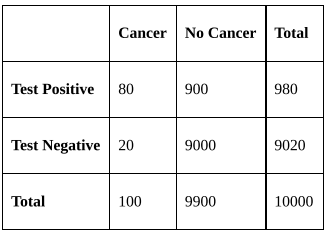

If the result of this screening test on a person is positive, what is the
probability that they actually have cancer?

We have to compute P (C, P)


P(C\ P) = P(C) * P (P\ C) / P (P)

P(C) = 0.01
P(P) = 0.098
P (P\c) = 0.8

p(C\P) = 0.01 * 0.8 / 0.098 

In [19]:
result2 = 0.01 * 0.8 / 0.098 
print(f"Given that the screening result is positive, the probability that the person has cancer is: {result2}")

Given that the screening result is positive, the probability that the person has cancer is: 0.08163265306122448


Given a positive screening result, the chance that the subject has cancer is
8.16%, which is significantly higher than the one under general assumption
(100/10000=1%) without the subject undergoing the screening.